# Pyber Plotting

#### Analysis

* Rural areas are the weakest performers for Pyber.  This is likely due to smaller population of residences/riders and people are likely to own cars. 
* Surburban areas are communities that can benefit from Pyber.  The people are within a reasonable distance from the urban areas to request a ride. 
* The urban market is the greatest share of rides, fares and drivers.  This is likely due to most individuals who live in urban areas do not own cars but are still looking for a more efficient way to get around cities, versus ride public transportation.

In [1]:
#Set dependencies
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Read csv files
csvpath1 = os.path.join('raw_data', 'ride_data.csv')
ride_df = pd.read_csv(csvpath1)

csvpath2 = os.path.join('raw_data', 'city_data.csv')
city_df = pd.read_csv(csvpath2)

#remove duplicates
city_df = city_df.drop_duplicates('city', keep = 'first')

#Merge dataframes
cityride_df = pd.merge(ride_df, city_df, how = "left", on=['city', 'city'])

In [2]:
#Calculate the Total Count of City and Rides
ride_count = cityride_df["driver_count"].count()
city_count = len(cityride_df["city"].unique())
                     
#Calculate Total Fare
total_fare = cityride_df["fare"].sum()

cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


# Bubble Plot of Ride Sharing Data

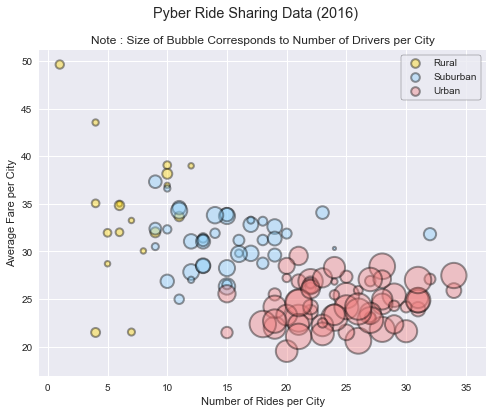

In [3]:
#create data points
by_city = cityride_df.groupby('city')
avg_fare = by_city.mean()['fare']
ride_count = by_city['ride_id'].count()
driver_count = by_city.mean()['driver_count']
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

sns.set()

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

#three scatter plots for each city type

plt.figure(figsize=(8,6))
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .4, linewidth=2)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .4, linewidth=2)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .4, linewidth=2)

#print scatter plot

plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

#create legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()


# Total Fares by City Type

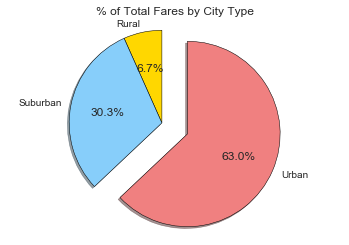

In [4]:
#calculate total fare by city
by_type = cityride_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = by_type.sum()['fare']
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Total Rides by City Type

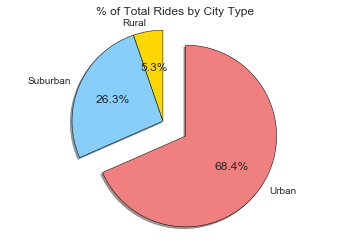

In [5]:
#total rides per city type
ride_sum = by_type.count()['ride_id']

#pie chart display
labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

# Drivers by City Type

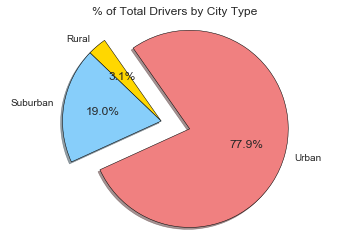

In [6]:
#driver per city type
driver_sum = city_df.groupby('type').sum()['driver_count']

#pie chart display
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()